<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/heart_beat_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install scikeras


In [6]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [8]:
import os
os.listdir()

['.config', 'heart.csv', 'sample_data']

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense








In [13]:
data = pd.read_csv("heart.csv")
print(data.head())
print(data.shape)


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)


In [14]:
X = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

print(X.dtypes)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object


In [15]:
cat_cols = X.select_dtypes(include=["object"]).columns
print(cat_cols)


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [16]:
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])


In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(734, 11) (184, 11)


In [19]:
from keras.models import Sequential
from keras.layers import Dense

def ann_model(input_dim):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [20]:
model = ann_model(X_train.shape[1])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5611 - loss: 0.6692 - val_accuracy: 0.7211 - val_loss: 0.6243
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8021 - loss: 0.5911 - val_accuracy: 0.7823 - val_loss: 0.5677
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8514 - loss: 0.5120 - val_accuracy: 0.8095 - val_loss: 0.5149
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8656 - loss: 0.4456 - val_accuracy: 0.8299 - val_loss: 0.4719
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8800 - loss: 0.3648 - val_accuracy: 0.8163 - val_loss: 0.4486
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8653 - loss: 0.3426 - val_accuracy: 0.8163 - val_loss: 0.4397
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8523 - loss: 0.3417 - val_accuracy: 0.8163 - val_loss: 0.4381
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8535 - loss: 0.3359 - val_accuracy: 0.8231 - val_lo

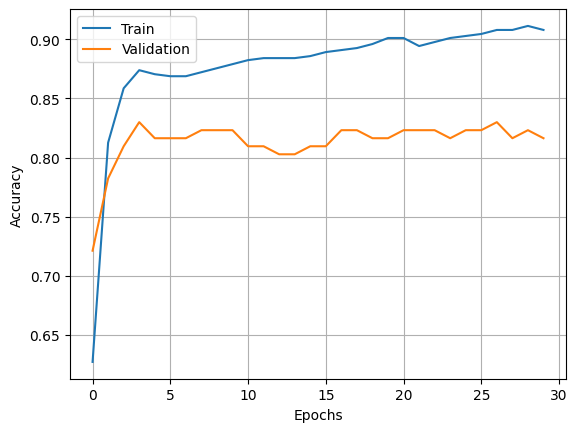

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()


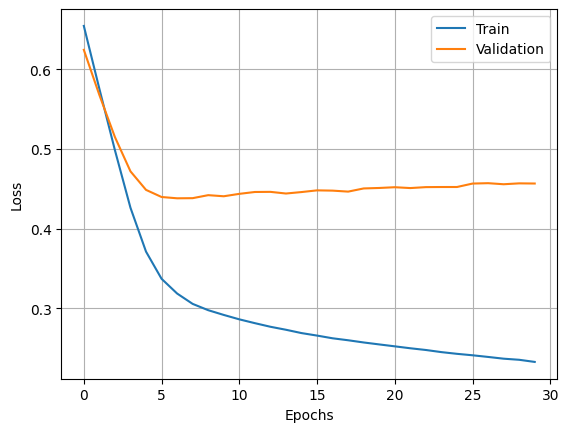

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Writing cross_validation.py


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        82
           1       0.86      0.93      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



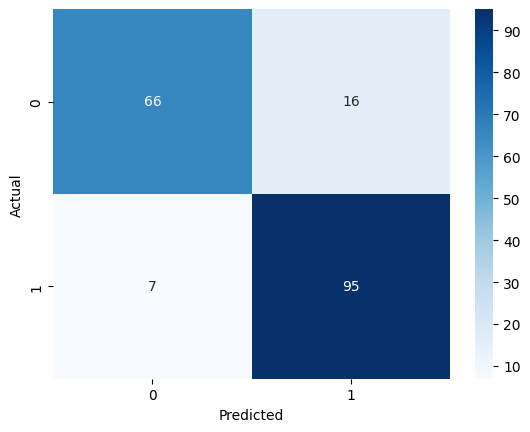

In [24]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracies = []
fold = 1

for train_idx, val_idx in kfold.split(X_train):
    print(f"\nTraining Fold {fold}")

    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = ann_model(X_train.shape[1])

    model.fit(
        X_tr, y_tr,
        epochs=30,
        batch_size=32,
        verbose=0
    )

    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

    cv_accuracies.append(acc)
    fold += 1

print("\nCross-Validation Accuracies:", cv_accuracies)
print("Mean CV Accuracy:", np.mean(cv_accuracies))
print("Standard Deviation:", np.std(cv_accuracies))



Training Fold 1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 Accuracy: 0.8367

Training Fold 2
Fold 2 Accuracy: 0.8571

Training Fold 3
Fold 3 Accuracy: 0.8503

Training Fold 4
Fold 4 Accuracy: 0.8435

Training Fold 5
Fold 5 Accuracy: 0.8493

Cross-Validation Accuracies: [0.8367347121238708, 0.8571428656578064, 0.8503401279449463, 0.8435373902320862, 0.8493150472640991]
Mean CV Accuracy: 0.8474140286445617
Standard Deviation: 0.006868803757103567


In [1]:
from data_loader import load_data
from preprocessing import preprocess_data
from model import ann_model
from train import train_model
from evaluation import evaluate_model, plot_history
from cross_validation import cross_validate

# Load data
data = load_data("heart.csv")

# Preprocess
X_train, X_test, y_train, y_test = preprocess_data(data)

# Build model
model = ann_model(X_train.shape[1])

# Train
history = train_model(model, X_train, y_train)

# Evaluate
plot_history(history)
evaluate_model(model, X_test, y_test)

# Cross Validation
cross_validate(X_train, y_train)


ModuleNotFoundError: No module named 'data_loader'

In [27]:
import numpy as np
from sklearn.model_selection import KFold
from model import ann_model

def cross_validate(X_train, y_train):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    accuracies = []
    fold = 1

    for train_idx, val_idx in kfold.split(X_train):
        print(f"\nTraining Fold {fold}")

        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = ann_model(X_train.shape[1])
        model.fit(X_tr, y_tr, epochs=30, batch_size=32, verbose=0)

        loss, acc = model.evaluate(X_val, y_val, verbose=0)
        print(f"Fold {fold} Accuracy: {acc:.4f}")

        accuracies.append(acc)
        fold += 1

    print("\nCross-Validation Accuracies:", accuracies)
    print("Mean CV Accuracy:", np.mean(accuracies))
    print("Std Dev:", np.std(accuracies))


ModuleNotFoundError: No module named 'model'

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)
Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6362 - loss: 0.6304 - val_accuracy: 0.7551 - val_loss: 0.5540
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7729 

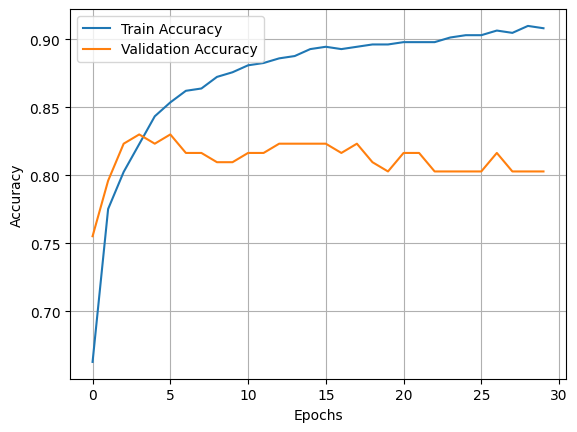

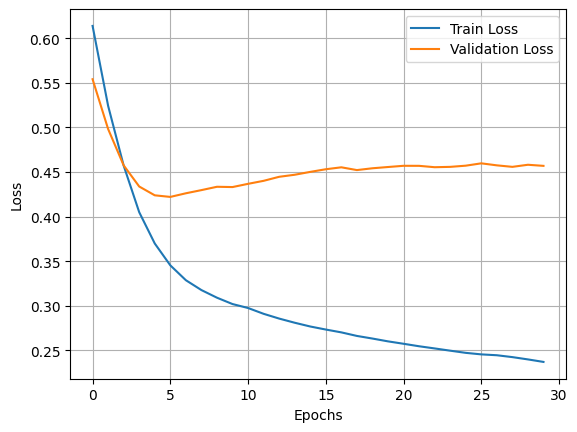

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8651 - loss: 0.3264 
Test Accuracy: 0.8587
Test Loss: 0.3607
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        82
           1       0.85      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



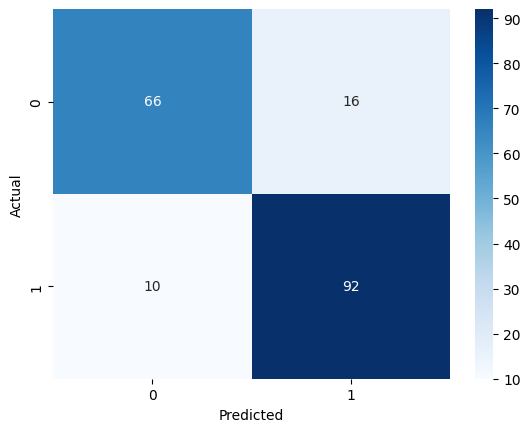

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [13]:
# ================================
# 1. Importing libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

# ================================
# 2. Load the data
# ================================
# File is CSV but named as .xls
data = pd.read_csv("heart.csv")
print(data.head())
print(data.shape)

#data = pd.read_csv("heart.csv.xls")

#print(data.head())
#print(data.shape)

# ================================
# 3. Data preprocessing
# ================================

# Target column
target_col = "HeartDisease"

# Separate features & target
X = data.drop(columns=[target_col])
y = data[target_col]

# Encode categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# 4. ANN Model
# ================================
def ann_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary output

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# ================================
# 5. Accuracy & Loss Plots
# ================================
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# ================================
# 6. Model Evaluation
# ================================
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ================================
# 7. Cross Validation
# ================================
estimator = KerasClassifier(
    build_fn=ann_model,
    epochs=30,
    batch_size=32,
    verbose=0
)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(estimator, X_train, y_train, cv=kfold)

print("Cross Validation Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
